# One-Hot Encoding vs. Label Encoding using Scikit-Learn

Alakh Sethi, March 6, 2020. [Here](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/?utm_source=av&utm_medium=feed-articles&utm_campaign=feed) 

`What is One-Hot Encoding? When should you use One-Hot Encoding over Label Encoding?`

Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. 

## Table of Contents
1. What is Categorical Encoding?
2. Different Approaches to Categorical Encoding
    - Label Encoding
    - One-Hot Encoding
3. When to use Label Encoding vs. One-Hot Encoding?

## 1. What is Categorical Encoding?

Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. A **machine can only understand the numbers. It cannot understand the text. That’s essentially the case with Machine Learning algorithms too**.

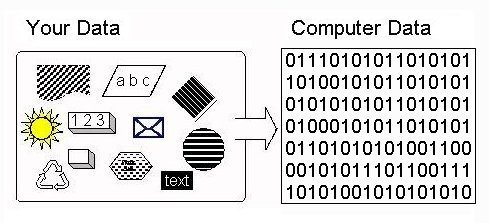

That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. **This process is called categorical encoding**.

## 2. Different Approaches to Categorical Encoding

So, how should we handle categorical variables? As it turns out, there are multiple ways of handling Categorical variables. In this article, I will discuss the two most widely used techniques:
- Label Encoding
- One-Hot Encoding

### 2.1 Label Encoding

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, **each label is assigned a unique integer based on alphabetical ordering**.

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl

%matplotlib inline

In [11]:
data = pd.read_csv('..\data\country.salary.data.csv')
print('\n Shape of the data:\n')
print(data.shape)
print('\n Data\'s Info:\n')
print(data.info())
print('\n First data rows:')
data.head(10)


 Shape of the data:

(10, 3)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Country    10 non-null object
Age        10 non-null int64
Salary     10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None

 First data rows:


,Country,Age,Salary
0,France,44,72000
1,Spain,27,48000
2,Germany,30,54000
3,Spain,38,61000
4,Germany,40,61000
5,France,35,58000
6,Spain,35,52000
7,France,48,79000
8,Germany,50,83000
9,France,37,67000


As you can see here, the first column, Country, is the categorical feature as it is represented by the object data type and the rest of them are numerical features as they are represented by int64.

In [12]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# load data
data = pd.read_csv('..\\data\\country.salary.data.csv')
print(data.head(10))

# Encode labels in column 'Country'. 
data['Country']= label_encoder.fit_transform(data['Country']) 

print('\n')
print(data.head(10))

Country  Age  Salary
0   France   44   72000
1    Spain   27   48000
2  Germany   30   54000
3    Spain   38   61000
4  Germany   40   61000
5   France   35   58000
6    Spain   35   52000
7   France   48   79000
8  Germany   50   83000
9   France   37   67000


   Country  Age  Salary
0        0   44   72000
1        2   27   48000
2        1   30   54000
3        2   38   61000
4        1   40   61000
5        0   35   58000
6        2   35   52000
7        0   48   79000
8        1   50   83000
9        0   37   67000


As you can see here, label encoding uses alphabetical ordering. Hence, France has been encoded with 0, the Spain with 2, and Germany with 1.

#### Challenges with Label Encoding

In the above scenario, the Country names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as India < Japan < the US.

This is something that we do not want! So how can we overcome this obstacle? Here comes the concept of One-Hot Encoding.

### 2.2 One-Hot Encoding

One-Hot Encoding is another popular technique for treating categorical variables. It simply **creates additional features based on the number of unique values in the categorical feature**. Every unique value in the category will be added as a feature.

In this encoding technique, each category is represented as a one-hot vector. Let’s see how to implement one-hot encoding in Python:

In [13]:
# importing one hot encoder 
# from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# creating one hot encoder object 
onehotencoder = OneHotEncoder()

# load data
data = pd.read_csv('..\\data\\country.salary.data.csv')
print(data.head(10))

# reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data.Country.values.reshape(-1,1)).toarray()

# create a new df with X array
dfOneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 

# To add this back into the original dataframe 
df = pd.concat([data, dfOneHot], axis=1)

# droping the country column 
df= df.drop(['Country'], axis=1) 

#printing to verify 
print('\n')
print(df.head(10))

Country  Age  Salary
0   France   44   72000
1    Spain   27   48000
2  Germany   30   54000
3    Spain   38   61000
4  Germany   40   61000
5   France   35   58000
6    Spain   35   52000
7   France   48   79000
8  Germany   50   83000
9   France   37   67000


   Age  Salary  Country_0  Country_1  Country_2
0   44   72000        1.0        0.0        0.0
1   27   48000        0.0        0.0        1.0
2   30   54000        0.0        1.0        0.0
3   38   61000        0.0        0.0        1.0
4   40   61000        0.0        1.0        0.0
5   35   58000        1.0        0.0        0.0
6   35   52000        0.0        0.0        1.0
7   48   79000        1.0        0.0        0.0
8   50   83000        0.0        1.0        0.0
9   37   67000        1.0        0.0        0.0


As you can see here, 3 new features are added as the country contains 3 unique values – France,Spain, and Germany. In this technique, we solved the problem of ranking as each category is represented by a binary vector.

Can you see any drawbacks with this approach? Think about it before reading on.

### Challenges of One-Hot Encoding: Dummy Variable Trap

One-Hot Encoding results in a `Dummy Variable Trap` as the outcome of one variable can easily be predicted with the help of the remaining variables.

**Dummy Variable Trap is a scenario in which variables are highly correlated to each other**

The Dummy Variable Trap leads to the problem known as multicollinearity. **Multicollinearity** occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. Here, I will practically demonstrate how the problem of multicollinearity is introduced after carrying out the one-hot encoding.

One of the common ways to check for multicollinearity is the `Variance Inflation Factor (VIF)`:

- VIF=1, Very Less Multicollinearity
- VIF<5, Moderate Multicollinearity
- VIF>5, Extreme Multicollinearity (This is what we have to avoid)

Compute the VIF scores:

In [14]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df.drop(['Salary'], axis=1)
calculate_vif(df)

,Var,Vif
2,Country_0,27.04
3,Country_1,18.46
1,Salary,14.15
4,Country_2,12.29
0,Age,11.85


From the output, we can see that the dummy variables which are created using one-hot encoding have VIF above 5. We have a multicollinearity problem.

Now, let us drop one of the dummy variables to solve the multicollinearity issue:

In [15]:
df = df.drop(df.columns[[3]], axis=1)
calculate_vif(df)

,Var,Vif
1,Salary,363.22
0,Age,356.49
2,Country_0,2.47
3,Country_2,1.65


**VIF has increased**

## 3. When to use Label Encoding vs. One-Hot Encoding?

This question generally depends on your dataset and the model which you wish to apply. But still, a few points to note before choosing the right encoding technique for your model:

We apply One-Hot Encoding when:

- The categorical feature is **not ordinal** (like the countries above)
- The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

- The categorical feature is **ordinal** (like Jr. kg, Sr. kg, Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption